# **Домашнеее задание: Июльский курс (2020). Pro. Занятие 21**
## **Интеграция в Production. Часть 1** 
## Верхошинская Катерина Викторовна

## **LIGHT** 




### Задание:

1. Обучить модель mnist, сделать предсказание для картинки (у себя в ноутбуке). При запуске веб сервера должен выводиться результат предсказания (использовать метод POST)
2. Исправить код и добиться точного распознавания.

#### 1) Обучить модель mnist, сделать предсказание для картинки (у себя в ноутбуке). При запуске веб сервера должен выводиться результат предсказания (использовать метод POST)

#####1.1 Обучить модель mnist, сделать предсказание для картинки (у себя в ноутбуке).

In [ ]:
from keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

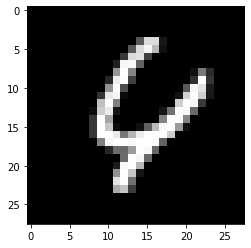

In [ ]:
n = 121
plt.imshow(Image.fromarray(x_test[n]).convert('RGBA'))
plt.show()

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train/255
x_test = x_test.astype('float32')
x_test = x_test/255 

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Epoch 1/20
240/240 [==============================] - 1s 4ms/step - loss: 1.0712 - acc: 0.6870 - val_loss: 0.2638 - val_acc: 0.9252
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2489 - acc: 0.9286 - val_loss: 0.2061 - val_acc: 0.9428
Epoch 3/20
240/240 [==============================] - 1s 4ms/step - loss: 0.1928 - acc: 0.9441 - val_loss: 0.1835 - val_acc: 0.9464
Epoch 4/20
240/240 [==============================] - 1s 4ms/step - loss: 0.1610 - acc: 0.9531 - val_loss: 0.1558 - val_acc: 0.9545
Epoch 5/20
240/240 [==============================] - 1s 4ms/step - loss: 0.1314 - acc: 0.9602 - val_loss: 0.1458 - val_acc: 0.9586
Epoch 6/20
240/240 [==============================] - 1s 4ms/step - loss: 0.1175 - acc: 0.9660 - val_loss: 0.1327 - val_acc: 0.9613
Epoch 7/20
240/240 [==============================] - 1s 4ms/step - loss: 0.1012 - acc: 0.9703 - val_loss: 0.1243 - val_acc: 0.9633
Epoch 8/20
240/240 [==============================] - 1s 4ms/step - loss: 0.

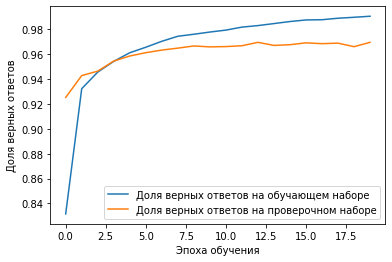

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=784, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

history = model.fit(x_train, 
          y_train, 
          batch_size=200, 
          epochs=20,  
          verbose=1, 
          validation_split=0.2)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
ev=model.evaluate(x_test,y_test)  
print(ev)

313/313 [==============================] - 1s 1ms/step - loss: 0.1073 - acc: 0.9708
[0.10731615871191025, 0.97079998254776]


In [ ]:
model.save("mnist.h5")
files.download("mnist.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Тестирование** 

In [ ]:
x = x_test[n]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)

[[2.6997642e-03 1.5803151e-08 2.8150324e-02 1.0375852e-05 9.5262456e-01
  3.4632033e-06 2.0763958e-03 2.2121971e-04 2.0816579e-04 1.4005684e-02]]


In [ ]:
prediction = np.argmax(prediction)
print("То что распознала сеть:", prediction)
print("Правильный ответ:", np.argmax(y_test[n]))

То что распознала сеть: 4
Правильный ответ: 4


#####1.2 При запуске веб сервера должен выводиться результат предсказания (использовать метод POST)

In [ ]:
from flask import Flask
import requests
from flask import request
from flask import jsonify

In [ ]:
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))

172.28.0.2


In [ ]:
import tensorflow as tf
from keras.models import load_model
import json

In [ ]:
#приложение
app = Flask(__name__)
model_flask=tf.keras.models.load_model("mnist.h5")

@app.route('/predict', methods=['GET','POST'])
def predict():
    if request.method == 'POST':
        post_file = request.files['file']
        post_file.save(f'/{post_file.filename}')
        X = image.load_img(f'/{post_file.filename}',target_size=(28, 28),color_mode = "grayscale")
        X = image.img_to_array(X)       
        X = X.reshape(1, 784)     
        prediction = np.argmax(model_flask.predict(X))
        answer = str(prediction)
    return answer

In [ ]:
import threading
threading.Thread(target=app.run, kwargs={'host':'172.28.0.2','port':5053}).start() 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://172.28.0.2:5053/ (Press CTRL+C to quit)


загрузим тестовую картинку 

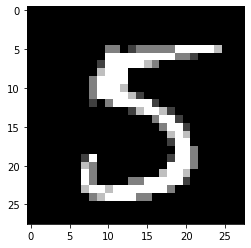

In [ ]:
img = image.load_img('image_test.png', target_size=(28, 28)) 
digital_arr = image.img_to_array(img)
plt.imshow(img)

In [ ]:
file = {'file': open('image_test.png', 'rb')}
r = requests.post('http://172.28.0.2:5053/predict', files=file)
print(r.status_code)
print(r.text)

172.28.0.2 - - [26/Jan/2021 17:12:40] "POST /predict HTTP/1.1" 200 -


200
5


#### 2) Исправить код и добиться точного распознавания.

Так как все работы проводились локально, то прикладываю скрины результатов работы

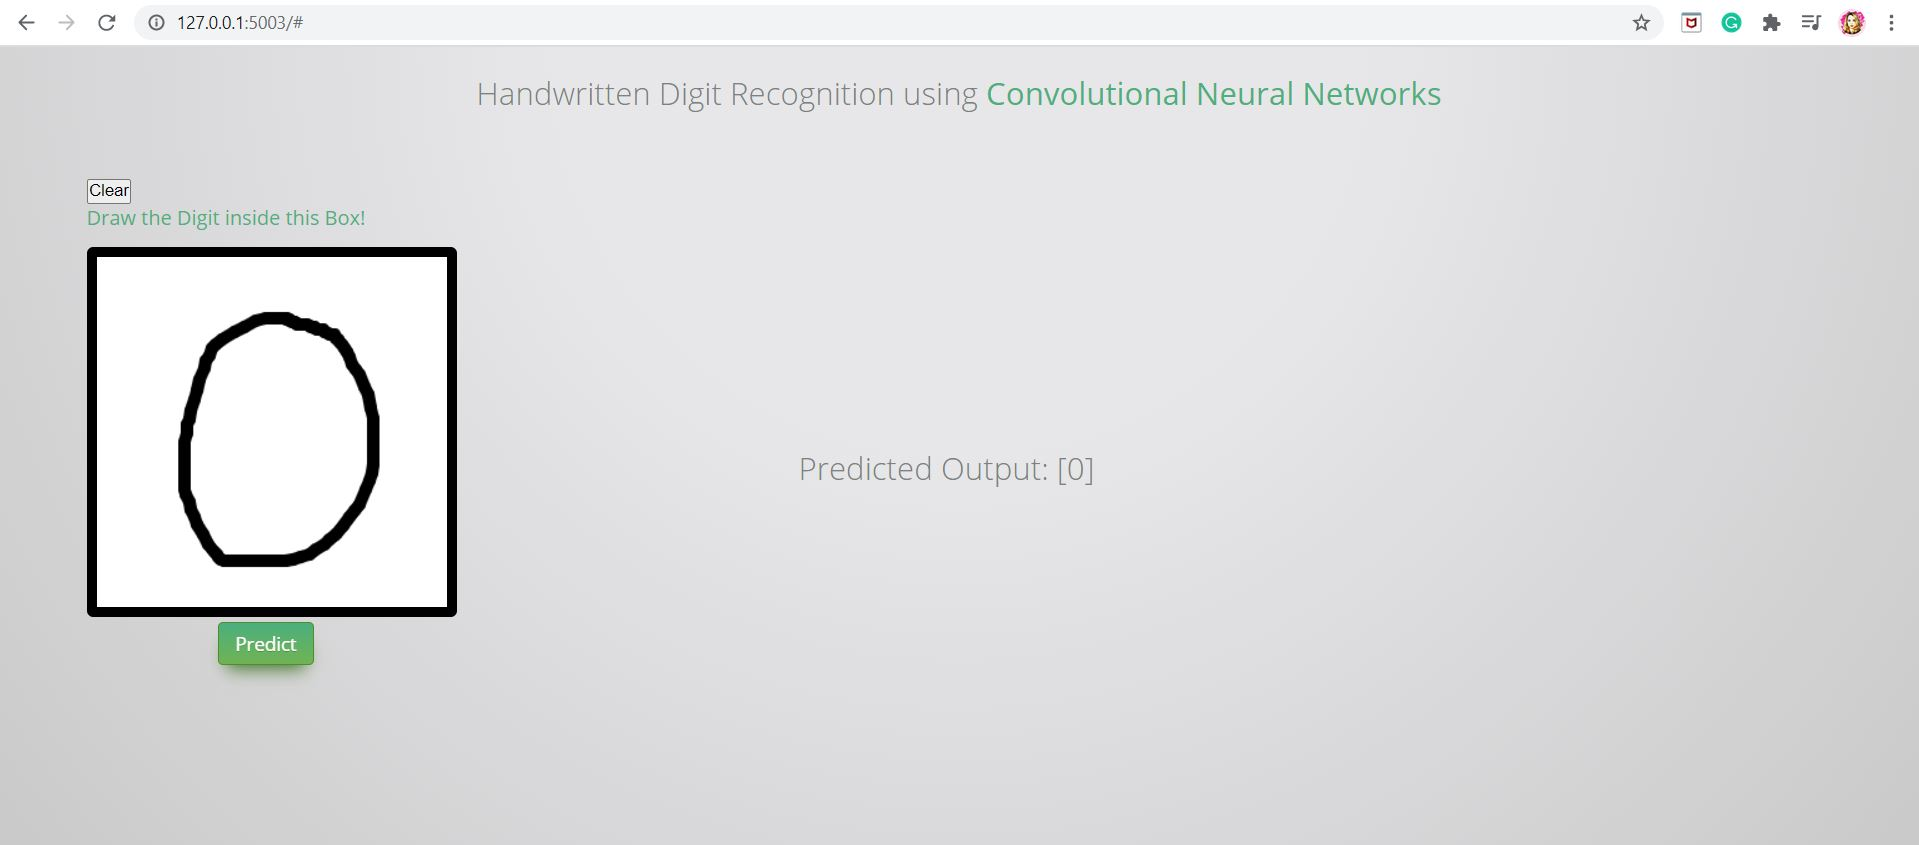

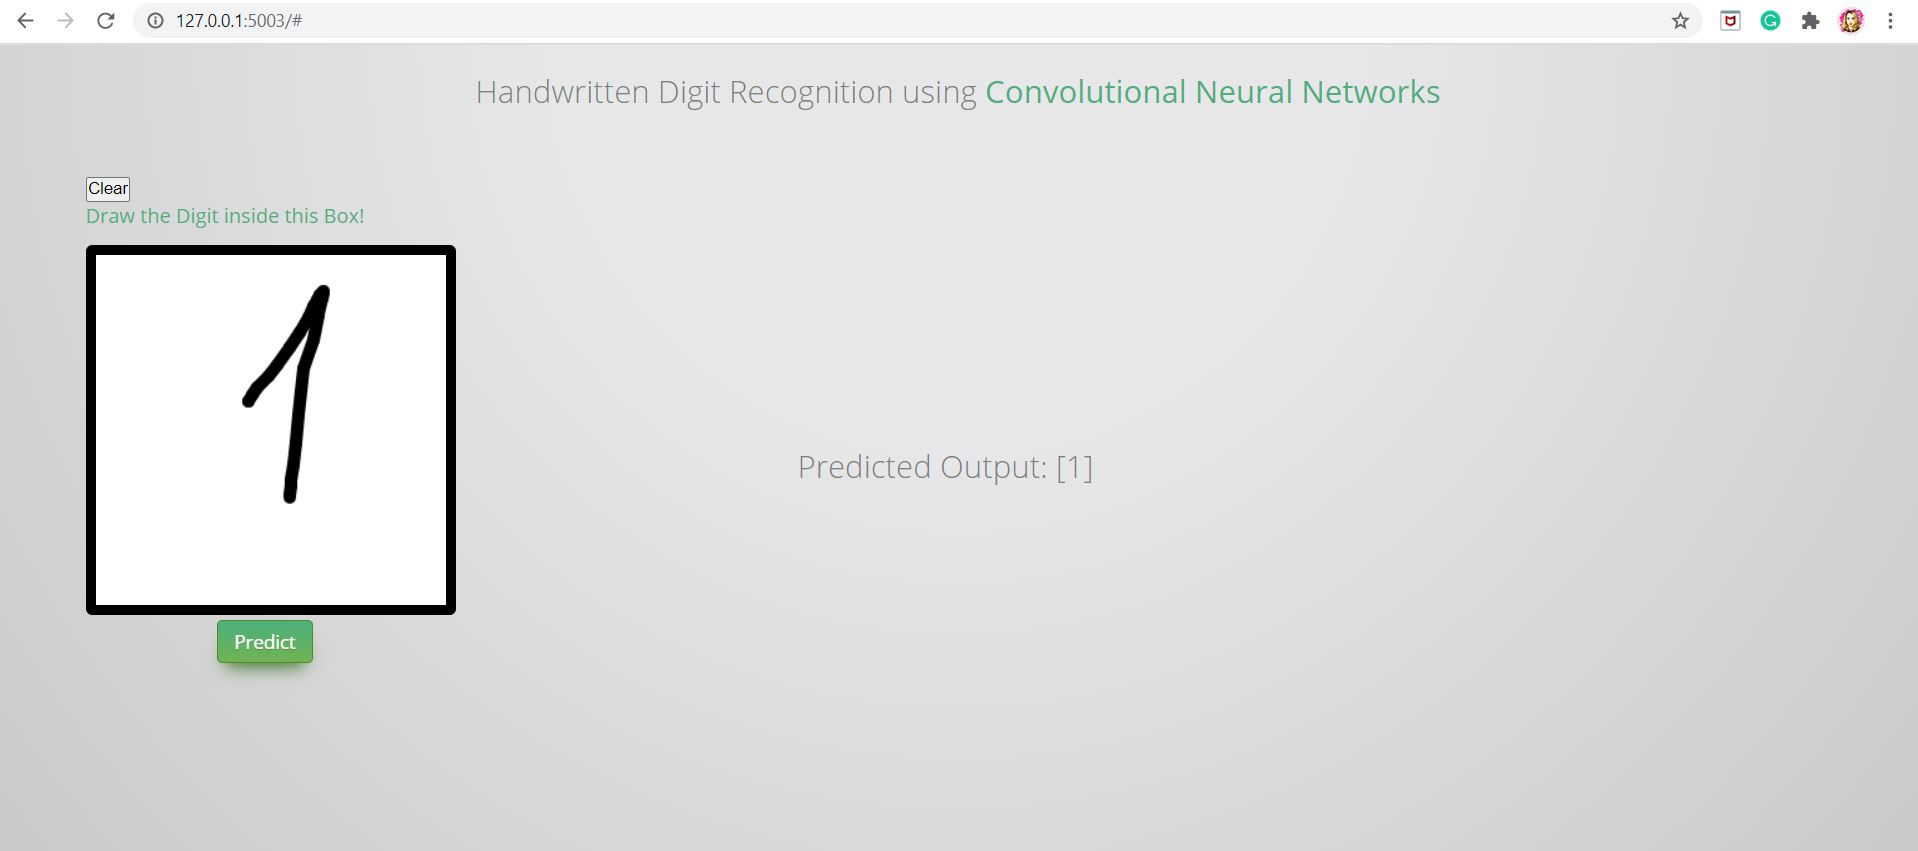

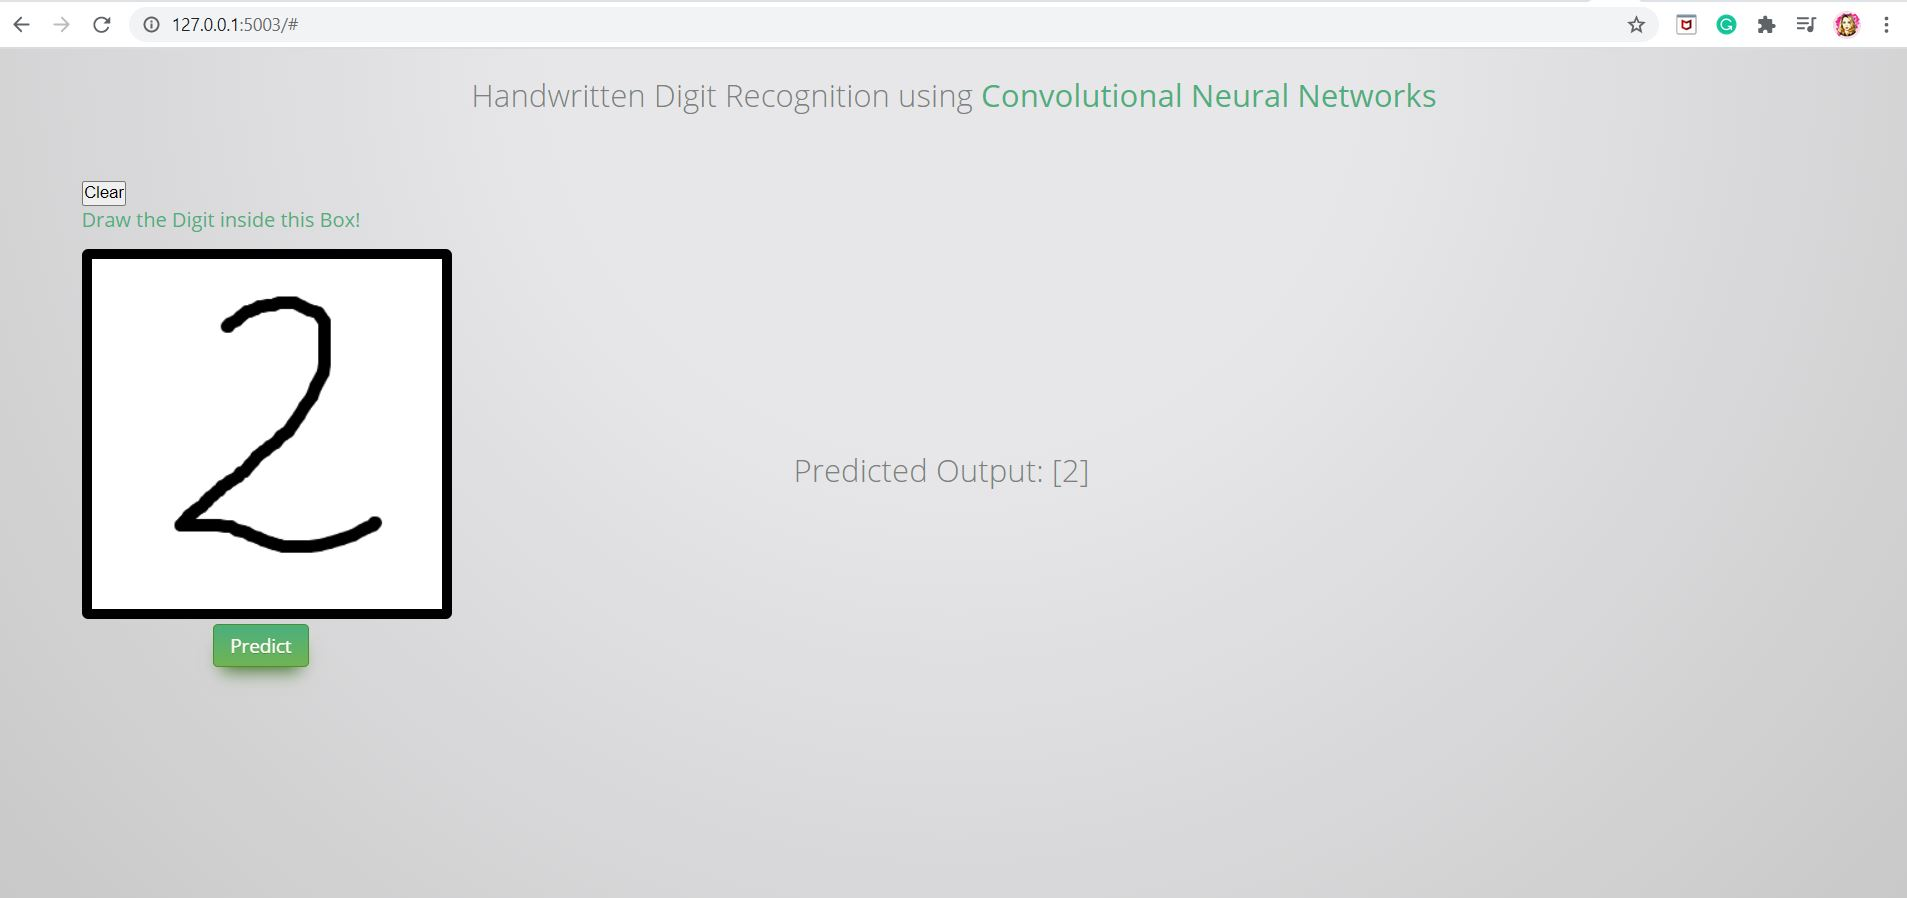

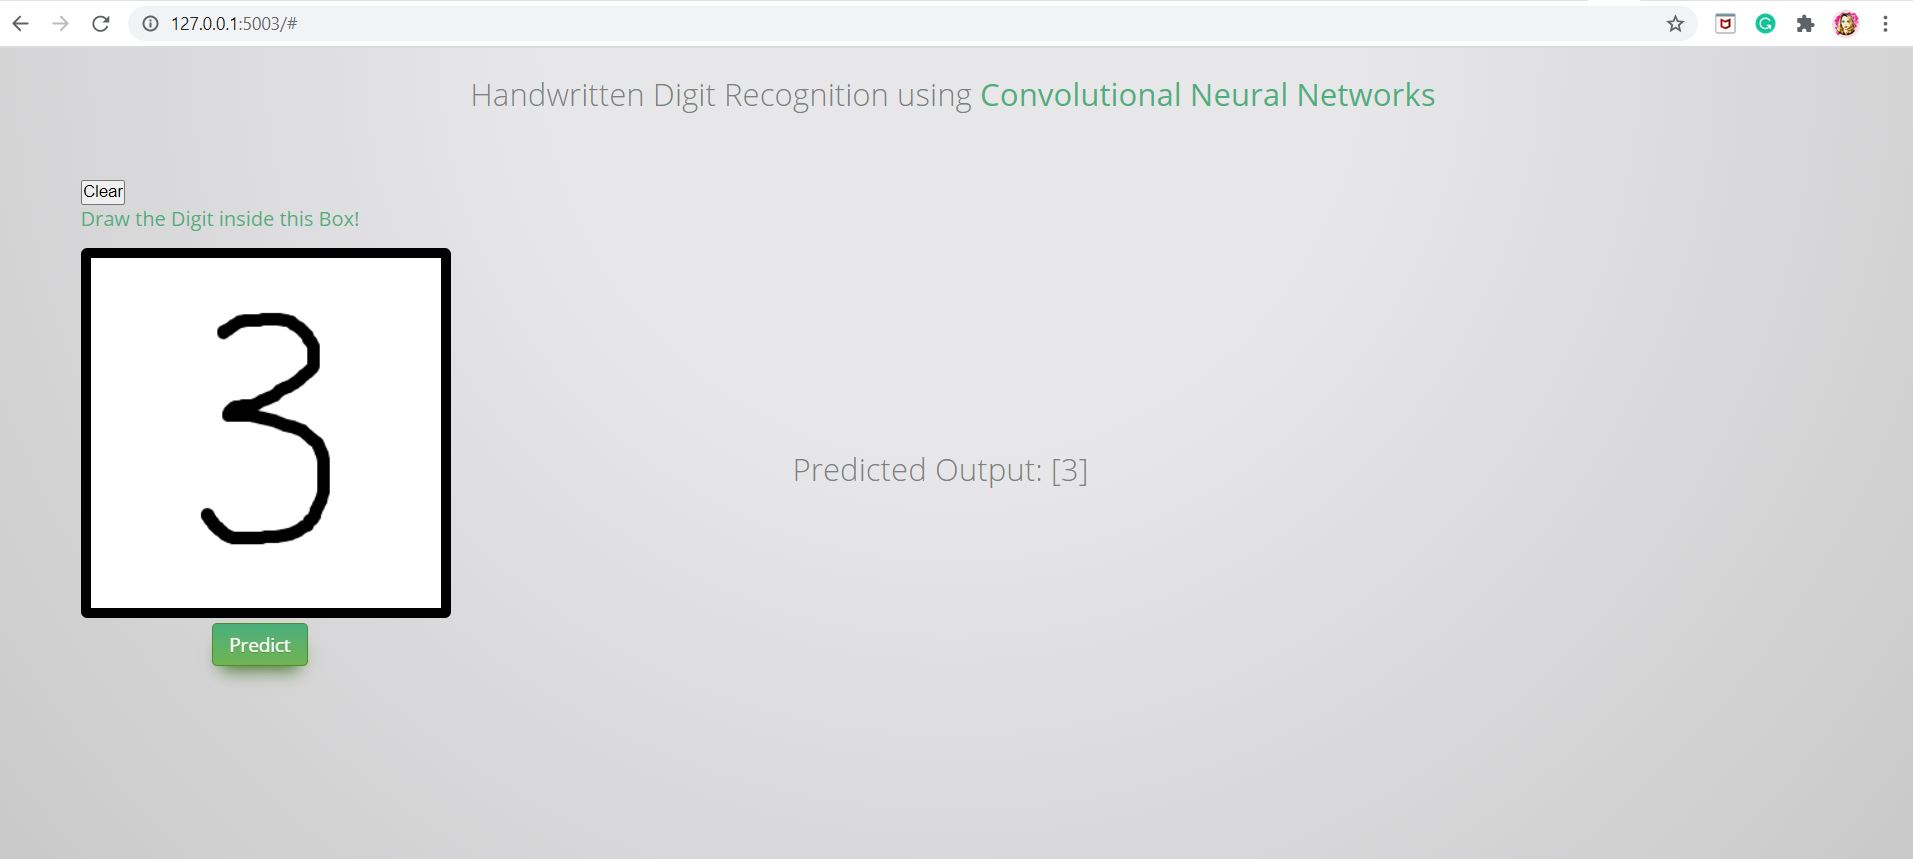

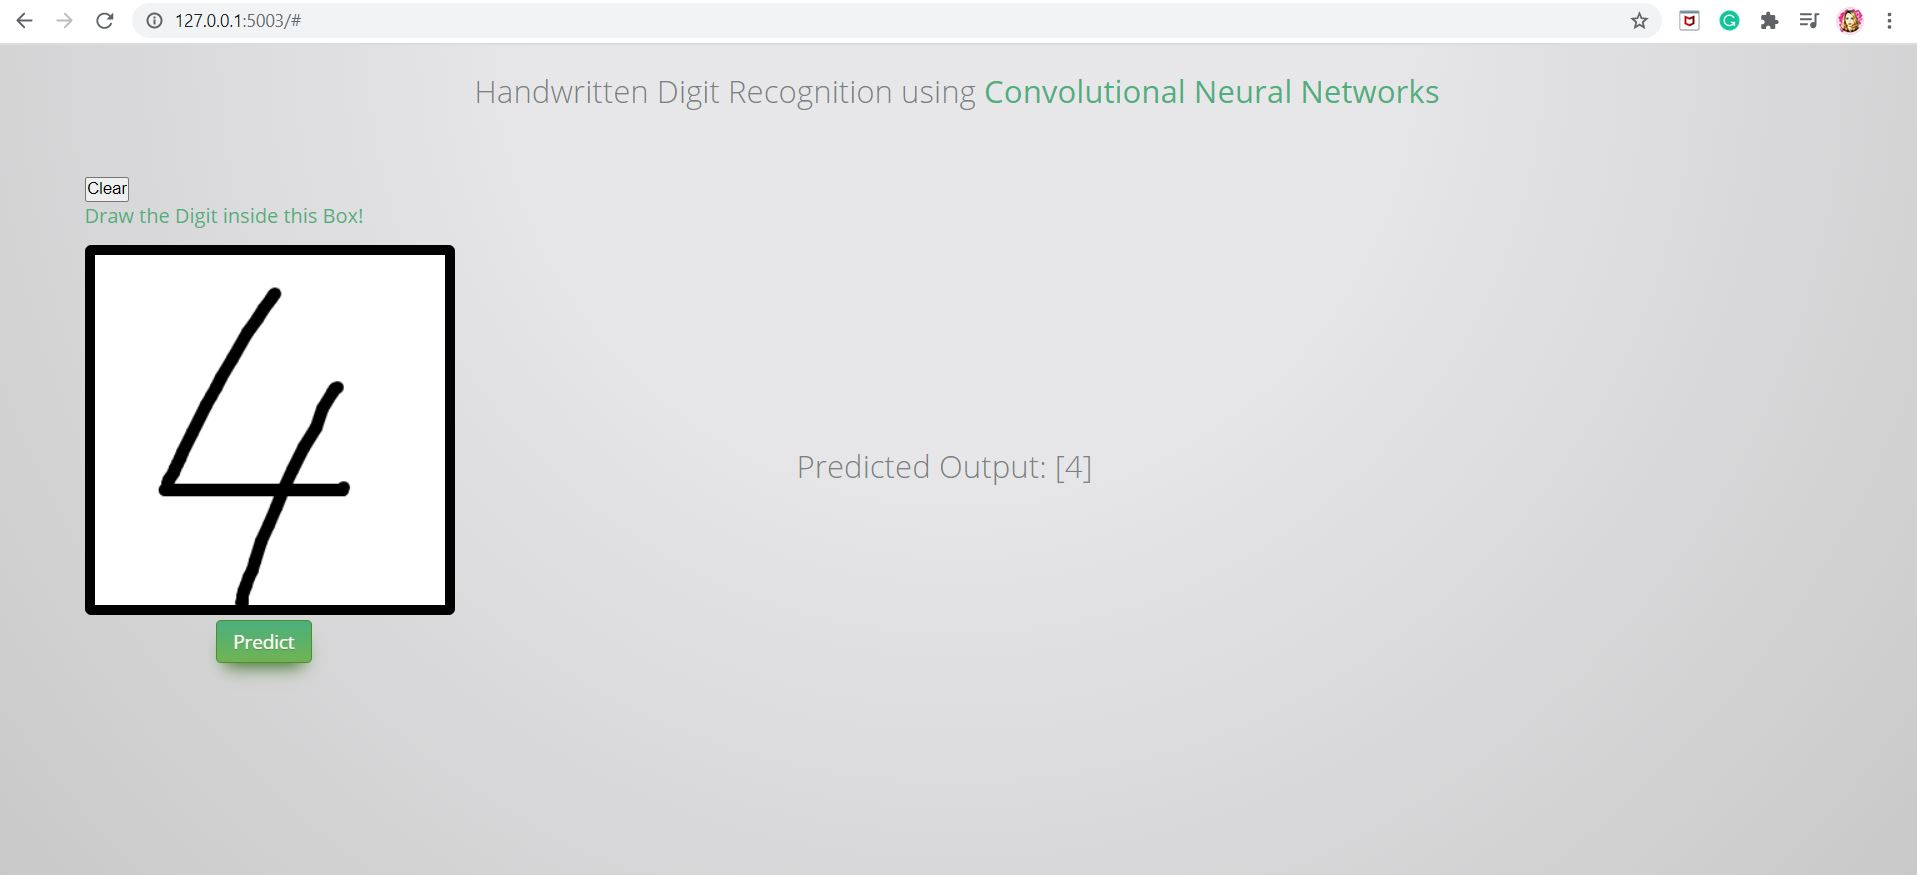

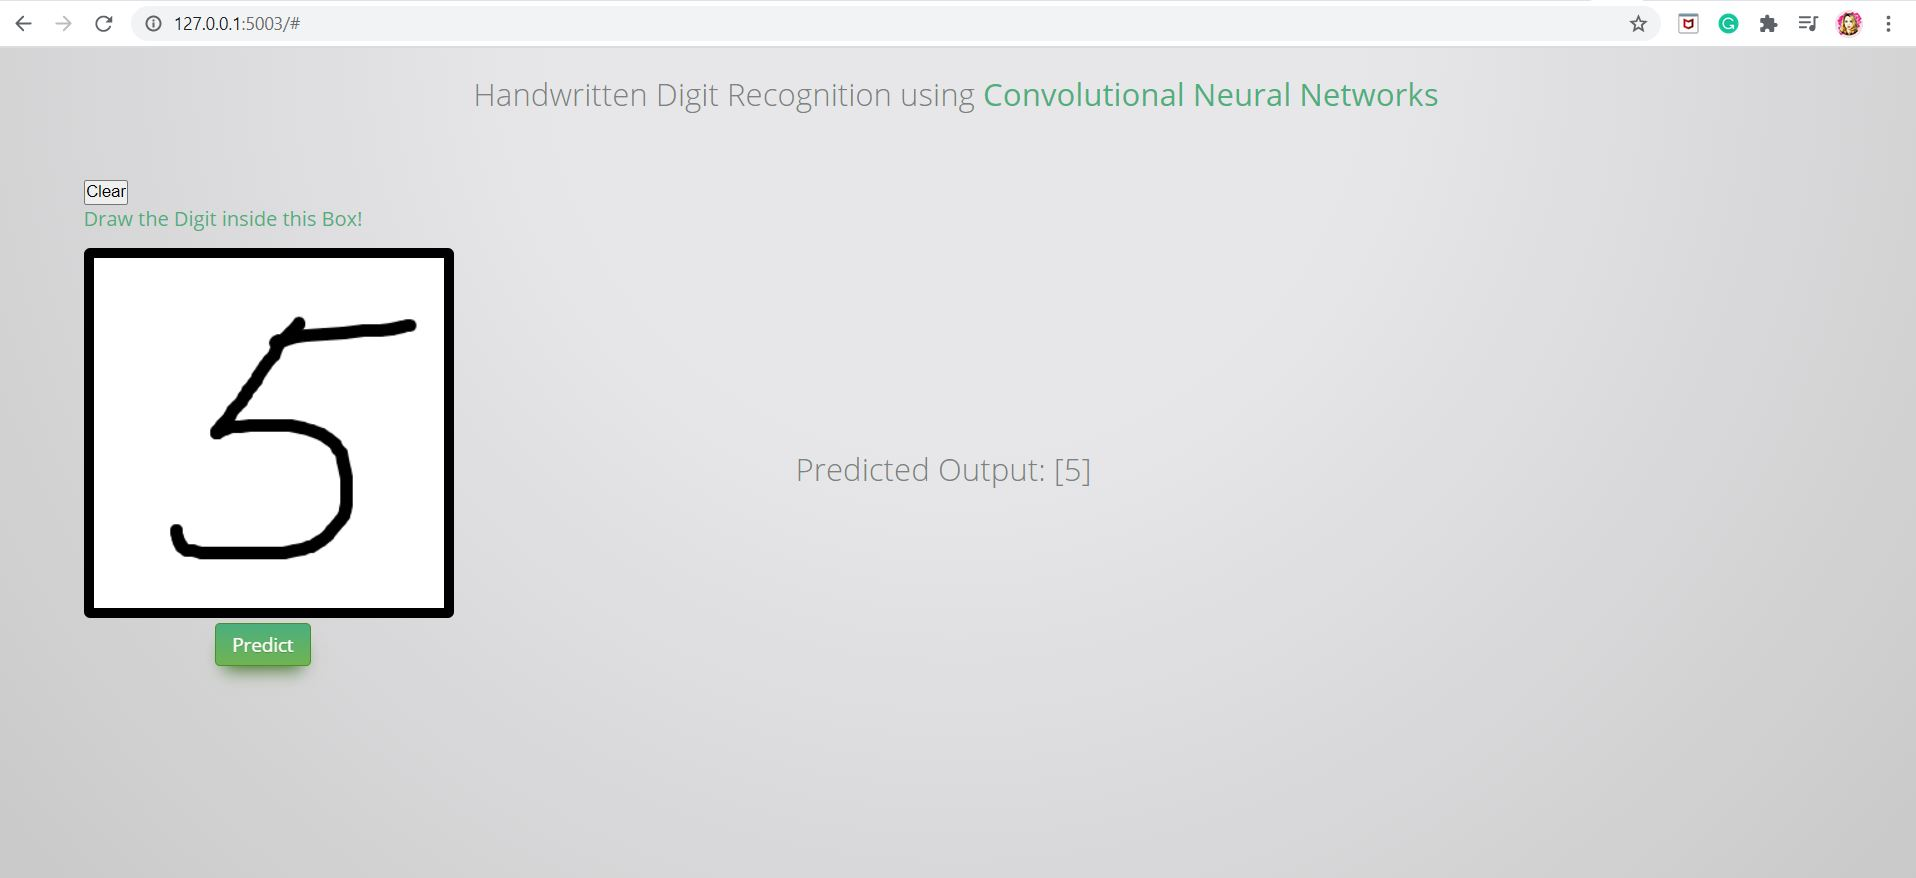

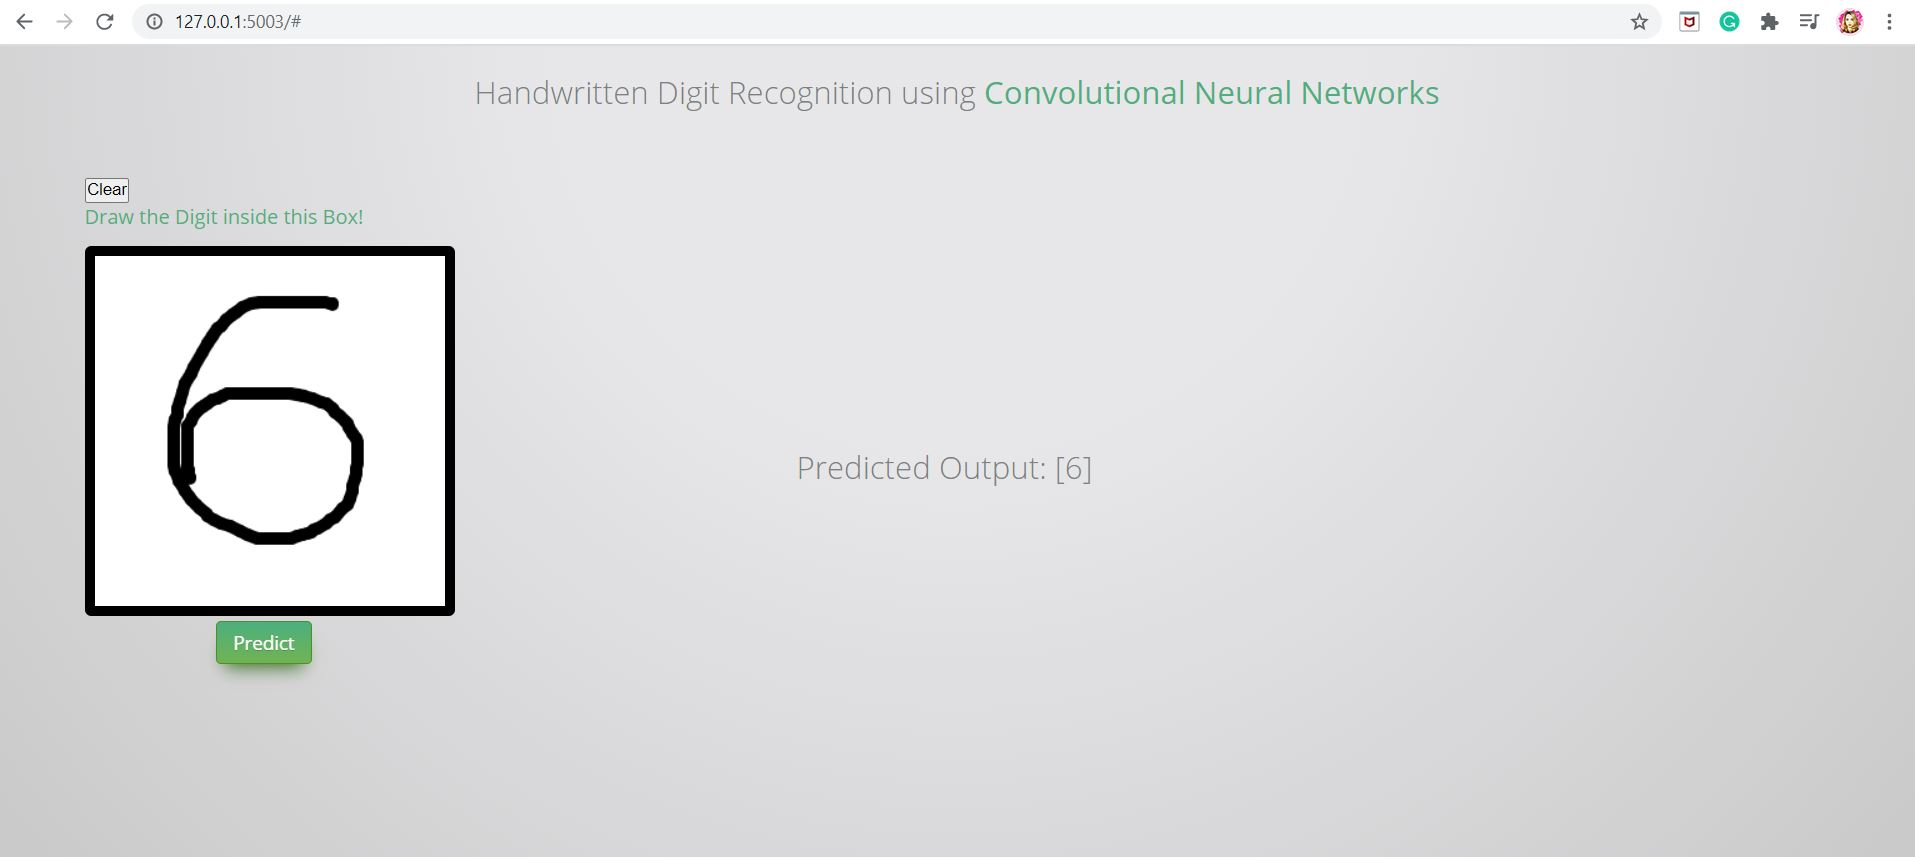

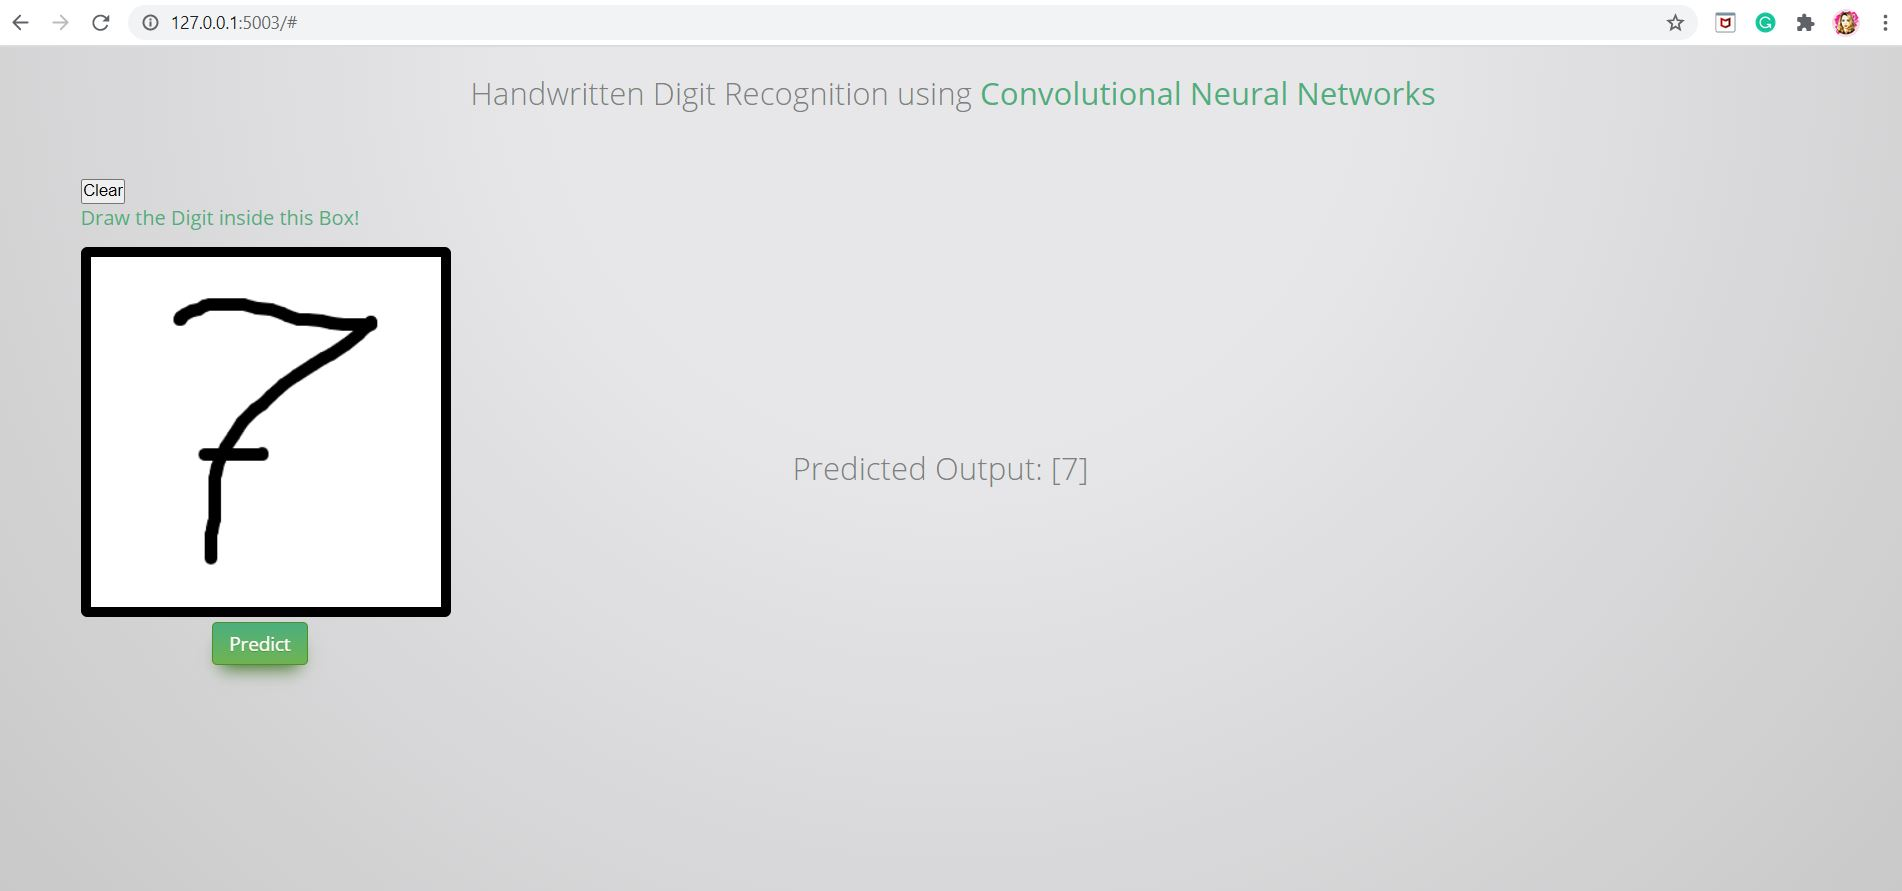

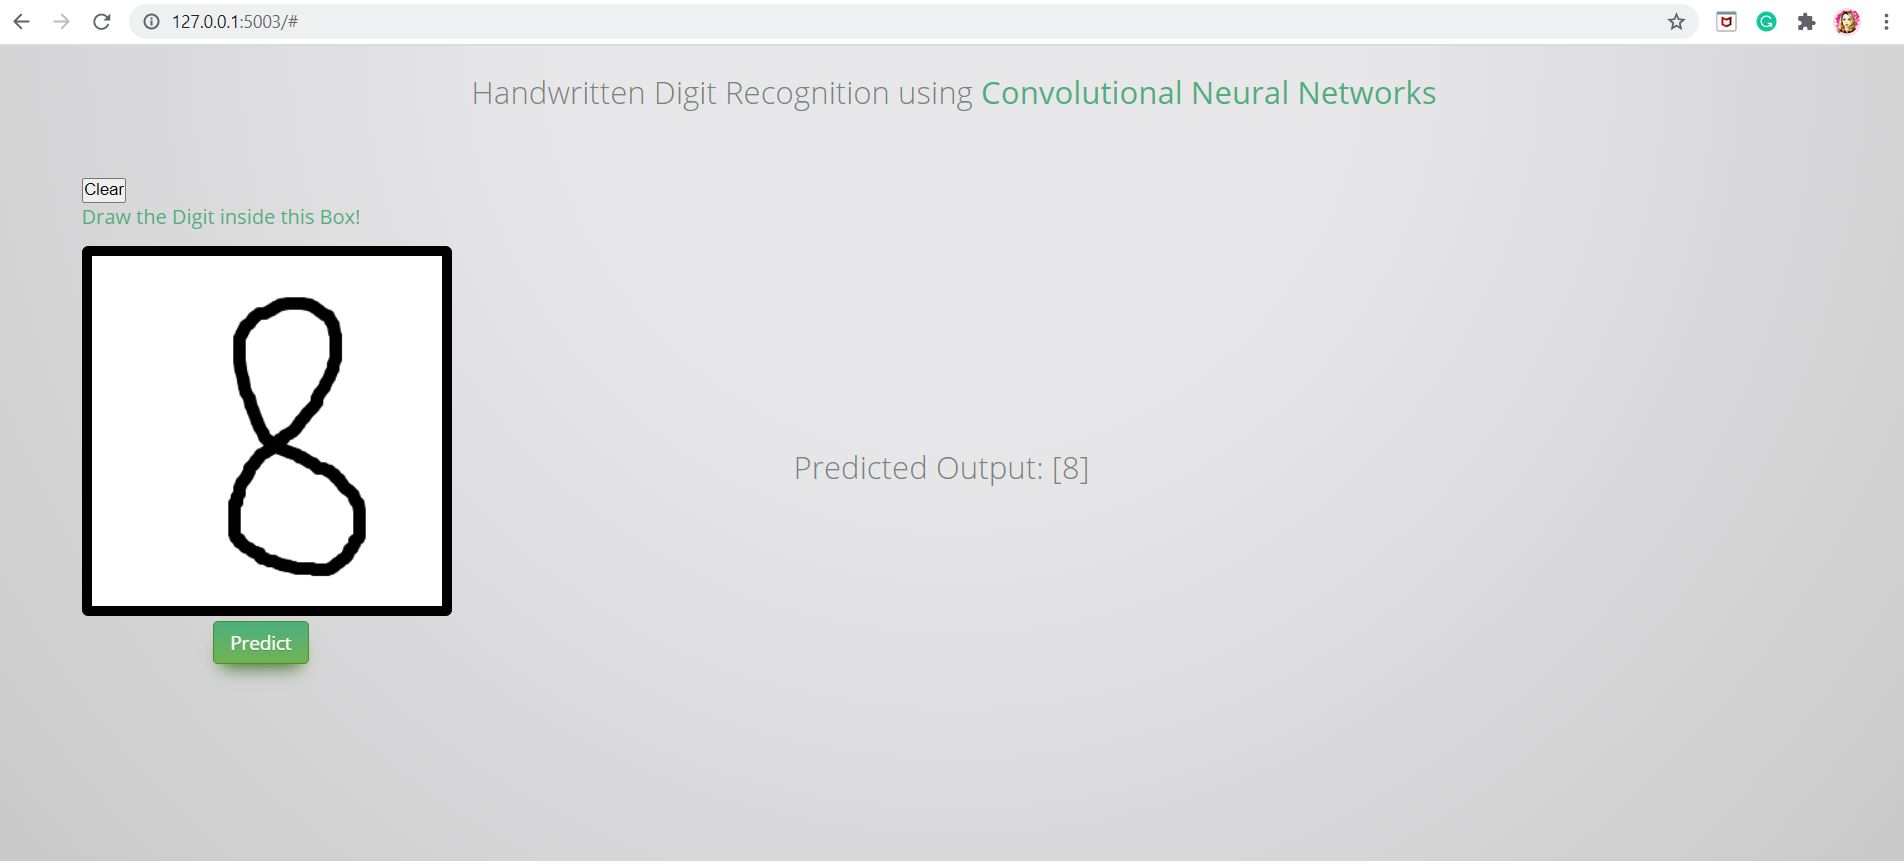

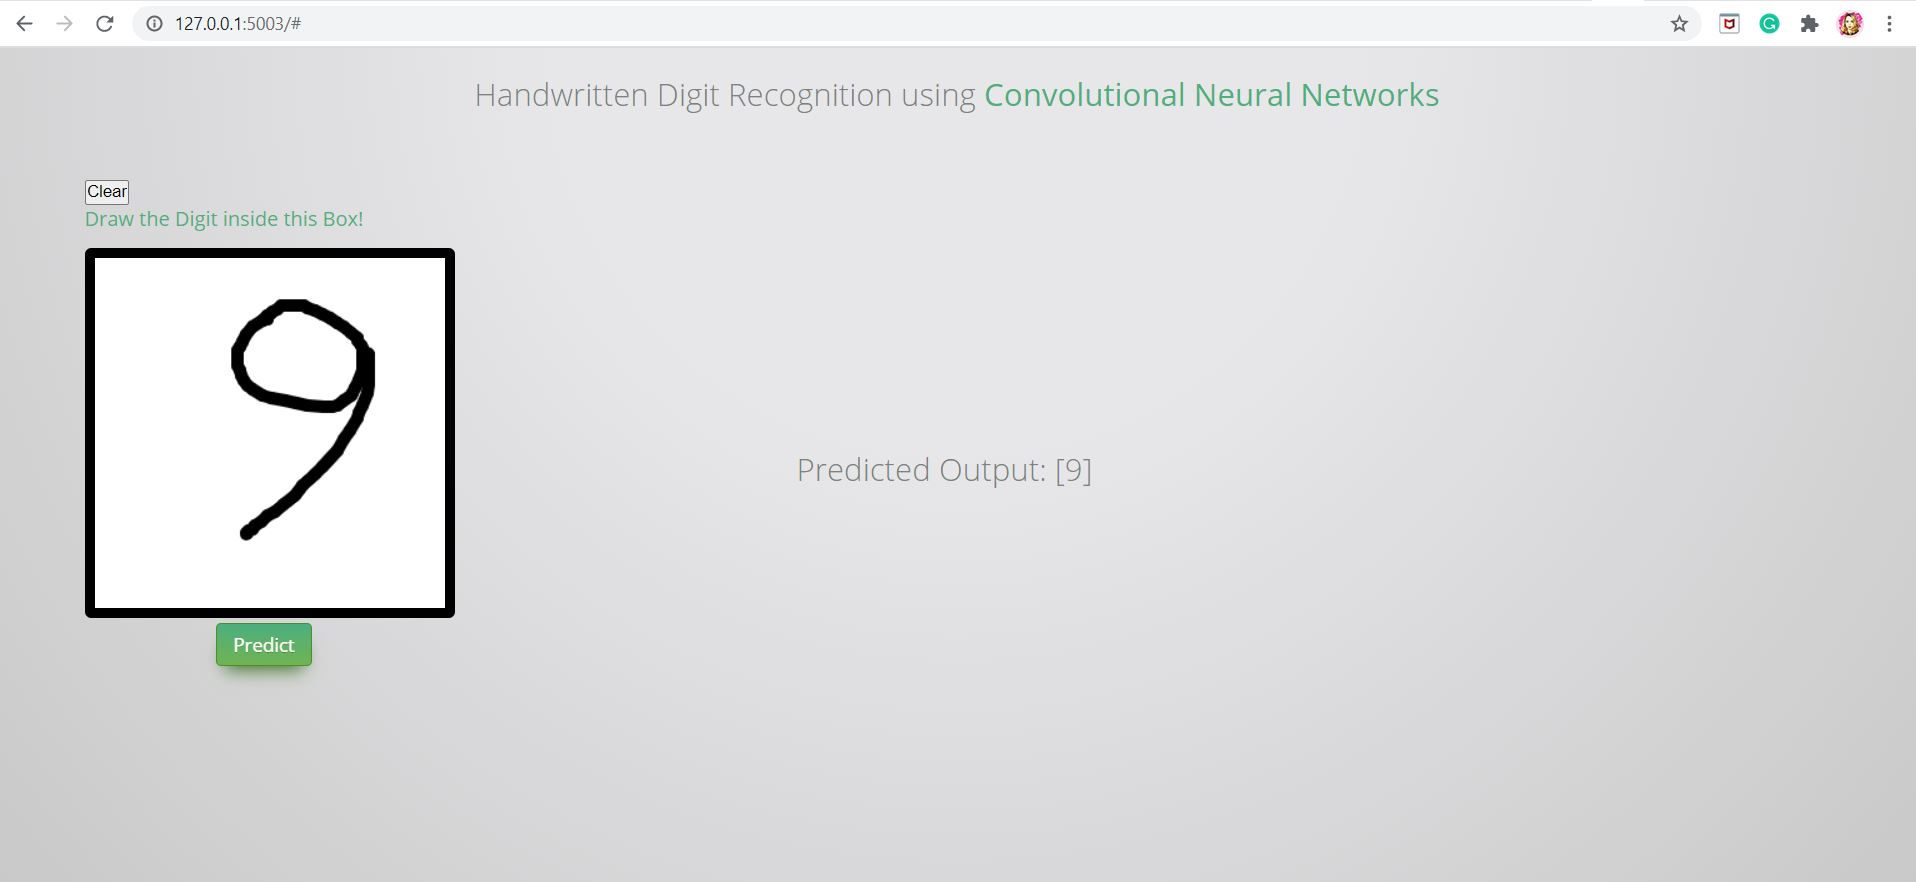

Все цифры распознались правильно! Чего и тредовалось в задании (добиться точного распознования).

## **PRO**

In [ ]:
# Устанавливаем необходимые компоненты
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [ ]:
!wget -q http://mirror.klaus-uwe.me/apache/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_275"
OpenJDK Runtime Environment (build 1.8.0_275-8u275-b01-0ubuntu1~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.275-b01, mixed mode)


In [ ]:
!ls /usr/lib/jvm/java-8-openjdk-amd64

ASSEMBLY_EXCEPTION  docs     jre  man	   THIRD_PARTY_README
bin		    include  lib  src.zip


In [ ]:
import os
# Задаем окружение
# Указываем переменные окружения для findspark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.0.1-bin-hadoop2.7"

Инциализируем pyspark из директории с библиотекой

In [ ]:
import findspark
findspark.init() 

Запускаем Spark-сессию

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
# Подгружаем google-диск
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Загружаем датасет с диска
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Базы/heart.csv')
# Преобразуем его в датафрейм spark
data = spark.createDataFrame(df)
data.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [ ]:
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Объединяем все числовые переменные в одну векторную колонку
assembler = VectorAssembler(
    inputCols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
    outputCol = 'Attributes') # создаем объект, преобразующий ряды и столбы в характеристические вектора
output = assembler.transform(data) # преобразуем 
output

DataFrame[age: bigint, sex: bigint, cp: bigint, trestbps: bigint, chol: bigint, fbs: bigint, restecg: bigint, thalach: bigint, exang: bigint, oldpeak: double, slope: bigint, ca: bigint, thal: bigint, target: bigint, Attributes: vector]

In [ ]:
# Выбираем X (созданная нами векторная колонка Attributes) и Y(колонка target)
finalized_data = output.select("Attributes","target")
finalized_data.show(truncate=False)

+------------------------------------------------------------+------+
|Attributes                                                  |target|
+------------------------------------------------------------+------+
|[63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0]|1     |
|[37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0]|1     |
|[41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0]|1     |
|[56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0]|1     |
|[57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0]|1     |
|[57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0]|1     |
|[56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0]|1     |
|[44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0]|1     |
|[52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0]|1     |
|[57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0]|1     |
|[54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0]|1     |
|[48.0,0.0,2.0,130.0

In [ ]:
# Делим данные на train/test 80:20
train_data,test_data = finalized_data.randomSplit([0.8,0.2])


### RandomForestClassifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier # Импортируем метод RandomForestClassifier

# Указываем по каким параметрам будет классификация
RandomForest = RandomForestClassifier(featuresCol = 'Attributes', labelCol = 'target')

# Запускаем обучение
RandomForest1 = RandomForest.fit(train_data)


In [ ]:
from pyspark.ml import Pipeline

# Создаем пайплайн(оценщик)
pipeline = Pipeline(stages=[RandomForest1])

# Обучаем модель
model = pipeline.fit(train_data)

# Делаем предсказание тестовых данных
predictions = model.transform(test_data)

# Выведем первые 20 значений
predictions.show(200, truncate=False)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Посчитаем точность модели
evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print("Точность метрики 'accuracy' = %g" % accuracy)

+------------------------------------------------------------+------+---------------------------------------+-----------------------------------------+----------+
|Attributes                                                  |target|rawPrediction                          |probability                              |prediction|
+------------------------------------------------------------+------+---------------------------------------+-----------------------------------------+----------+
|(13,[0,1,3,4,7,10,12],[59.0,1.0,138.0,271.0,182.0,2.0,2.0]) |1     |[5.490164763723728,14.50983523627627]  |[0.2745082381861864,0.7254917618138135]  |1.0       |
|(13,[0,3,4,7,10,12],[53.0,138.0,234.0,160.0,2.0,2.0])       |1     |[2.1735997275465433,17.82640027245346] |[0.10867998637732716,0.8913200136226729] |1.0       |
|[34.0,1.0,3.0,118.0,182.0,0.0,0.0,174.0,0.0,0.0,2.0,0.0,2.0]|1     |[2.081508114610144,17.91849188538986]  |[0.10407540573050718,0.8959245942694928] |1.0       |
|[37.0,1.0,2.0,130.0,2

Посчитаем точность используя 2 дополнительные метрики (weightedPrecision и weightedRecall)

In [ ]:
# Посчитаем точность модели
evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName='weightedPrecision')
weightedPrecision = evaluator.evaluate(predictions)
print("Точность метрики 'weightedPrecision'= %g" % weightedPrecision)

Точность метрики 'weightedPrecision'= 0.827206


In [ ]:
# Посчитаем точность модели
evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName='weightedRecall')
weightedRecall = evaluator.evaluate(predictions)
print("Точность метрики 'weightedRecall' = %g" % weightedRecall)

Точность метрики 'weightedRecall' = 0.823529


 ### GBTClassifier

In [ ]:
from pyspark.ml.classification import GBTClassifier

# Указываем по каким параметрам будет классификация
GBT = GBTClassifier(featuresCol = 'Attributes', labelCol = 'target')

# Обучаем модель
GBT = GBT.fit(train_data)

In [ ]:
# Создаем пайплайн(оценщик)
pipelineGBT = Pipeline(stages=[GBT])

# Обучаем модель
modelGBT = pipelineGBT.fit(train_data)

# Делаем предсказание тестовых данных
predictionsGBT = modelGBT.transform(test_data)

# Выводим первые 200 значений
predictionsGBT.show(200)

# Выводим метрику precisionByLabel
evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName='precisionByLabel')
accuracy = evaluator.evaluate(predictionsGBT)
print("Точность метрики 'precisionByLabel' = %g" % accuracy)

+--------------------+------+--------------------+--------------------+----------+
|          Attributes|target|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(13,[0,1,3,4,7,10...|     1|[-0.6737486941699...|[0.20627981935741...|       1.0|
|(13,[0,3,4,7,10,1...|     1|[-1.5765048228105...|[0.04097285343303...|       1.0|
|[34.0,1.0,3.0,118...|     1|[-1.0965436233257...|[0.10037297648040...|       1.0|
|[37.0,1.0,2.0,130...|     1|[-1.2502646354439...|[0.07582108449322...|       1.0|
|[41.0,0.0,1.0,105...|     1|[-0.9011496008834...|[0.14157141498900...|       1.0|
|[41.0,0.0,1.0,130...|     1|[-1.6067268768582...|[0.03866256141068...|       1.0|
|[41.0,0.0,2.0,112...|     1|[-1.1045924297724...|[0.09892871253185...|       1.0|
|[42.0,0.0,2.0,120...|     1|[-1.5389415758805...|[0.04402882820309...|       1.0|
|[42.0,1.0,2.0,130...|     1|[-1.1578527356219...|[0.08983056650142...|       1.0|
|[43

In [ ]:
# Выводим метрику weightedPrecision
evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName='weightedPrecision')
weightedPrecision = evaluator.evaluate(predictionsGBT)
print("Точность метрики 'weightedPrecision' = %g" % accuracy)

Точность метрики 'weightedPrecision' = 0.708333


In [ ]:
# Выводим метрику weightedRecall
evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName='weightedRecall')
weightedRecall = evaluator.evaluate(predictionsGBT)
print("Точность метрики 'weightedRecall' = %g" % accuracy)

Точность метрики 'weightedRecall' = 0.708333


## **ULTRA_PRO**

### **Задание**
Настроить окружение для  sparkdl и используя набор данных cats vs dogs обучить модель методом transferlearning на основе сети InceptionV3. Используя библиотеку sparkdl вывести результат в Spark DataFrame.

In [ ]:
# Устанавливаем необходимые компоненты
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (149 kB/s)

In [ ]:
!wget http://mirror.klaus-uwe.me/apache/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

--2021-01-28 14:13:15--  http://mirror.klaus-uwe.me/apache/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
Resolving mirror.klaus-uwe.me (mirror.klaus-uwe.me)... 94.130.201.139, 2a01:4f8:13b:228c::2
Connecting to mirror.klaus-uwe.me (mirror.klaus-uwe.me)|94.130.201.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233333392 (223M) [application/octet-stream]
Saving to: ‘spark-2.4.7-bin-hadoop2.7.tgz.1’

spark-2.4.7-bin-had 100%[===================>] 222.52M  23.2MB/s    in 11s     

2021-01-28 14:13:27 (19.7 MB/s) - ‘spark-2.4.7-bin-hadoop2.7.tgz.1’ saved [233333392/233333392]



In [ ]:
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
#библиотеки для использования spark deep learning
!pip install sparkdl
!pip install tensorframes 
!pip install kafka-python
!pip install tensorflowonspark

In [ ]:
!pip uninstall keras

Uninstalling Keras-2.0.8:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.0.8.dist-info/*
    /usr/local/lib/python3.6/dist-packages/keras/*
Proceed (y/n)? Y
  Successfully uninstalled Keras-2.0.8


In [ ]:
!pip install keras==2.0.8

  Using cached https://files.pythonhosted.org/packages/67/3f/d117d6e48b19fb9589369f4bdbe883aa88943f8bb4a850559ea5c546fefb/Keras-2.0.8-py2.py3-none-any.whl
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.


In [ ]:
!pip uninstall tensorflow
!pip uninstall protobuf
!pip install tensorflow==1.4.0

Uninstalling tensorflow-1.4.0:
  Would remove:
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/external/*
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? Y
  Successfully uninstalled tensorflow-1.4.0
Uninstalling protobuf-3.14.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/google/protobuf/*
    /usr/local/lib/python3.6/dist-packages/protobuf-3.14.0-py3.6-nspkg.pth
    /usr/local/lib/python3.6/dist-packages/protobuf-3.14.0.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled protobuf-3.14.0
  Using cached https://files.pythonhosted.org/packages/86/9f/be0165c6eefd841e6928e54d3d083fa174f92d640fdc52f73a33dc9c54d1/tensorflow-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/fe/fd/247ef25f5ec5f9acecfbc98ca3c6aaf66716cf52509aca9a93583d410493/protobuf-3.14.0-cp36-cp36m-manylinux1

In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

1.4.0
2.0.8


In [ ]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

openjdk version "1.8.0_275"
OpenJDK Runtime Environment (build 1.8.0_275-8u275-b01-0ubuntu1~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.275-b01, mixed mode)


In [ ]:
!ls /usr/lib/jvm/java-8-openjdk-amd64

ASSEMBLY_EXCEPTION  docs     jre  man	   THIRD_PARTY_README
bin		    include  lib  src.zip


In [ ]:
import os
# Задаем окружение
# Указываем переменные окружения для findspark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-2.4.7-bin-hadoop2.7"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q "/content/drive/My Drive/dogs-vs-cats" -d /content #Указываем путь к базе в Google Drive

replace /content/dogs-vs-cats/cats/cat.2336.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/dogs-vs-cats/cats/cat.2336.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


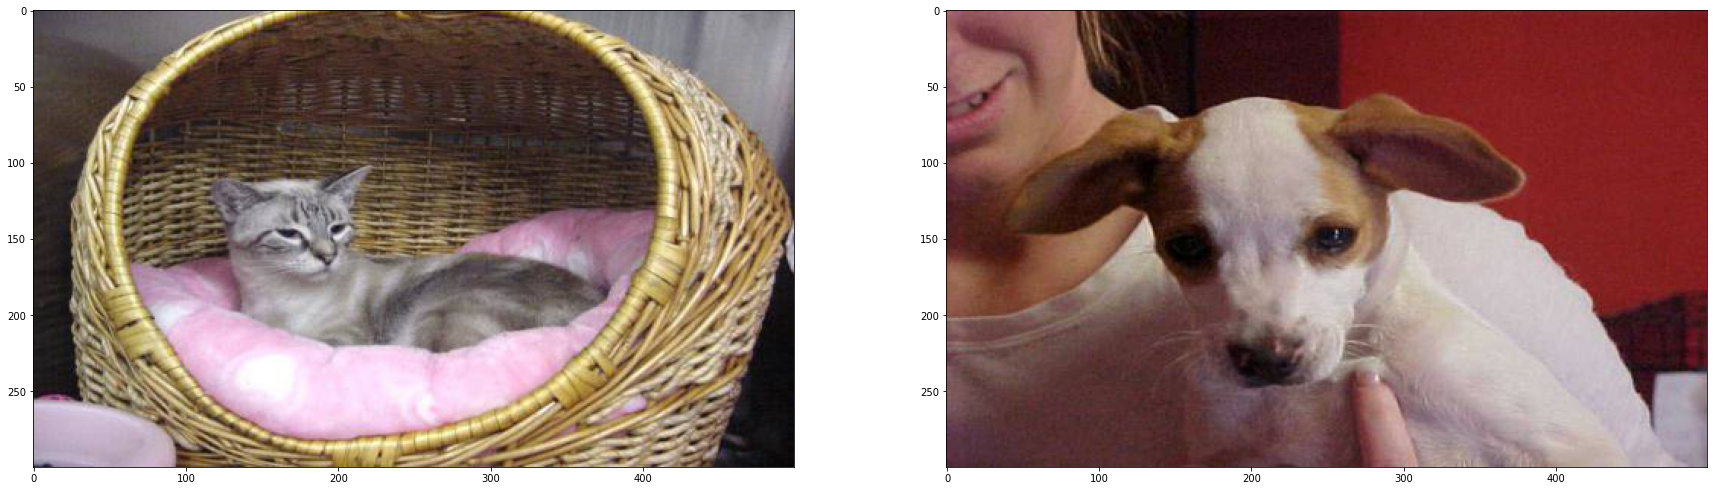

In [ ]:
import matplotlib.pyplot as plt #Для отрисовки графиков
from keras.preprocessing import image #Для отрисовки изображений
import random #Для генерации случайных чисел 
#Выводим для примера картинки по каждому классу
train_path = '/content/dogs-vs-cats'
fig, axs = plt.subplots(1, 2, figsize=(30, 50)) #Создаем полотно из 2 графиков
for i in range(2): #Проходим по всем классам
  dogsvscats_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = dogsvscats_path + random.choice(os.listdir(dogsvscats_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(300, 500))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
# создаем папку с образцами
!mkdir dogs-vs-cats/sample 
test_path = '/content/dogs-vs-cats/sample'

In [ ]:
# Эти три фото поместим в папку 
!cp dogs-vs-cats/dogs/dog.12400.jpg dogs-vs-cats/sample/
!cp dogs-vs-cats/cats/cat.2336.jpg dogs-vs-cats/sample/

In [ ]:
fs = !ls dogs-vs-cats/sample/*.jpg

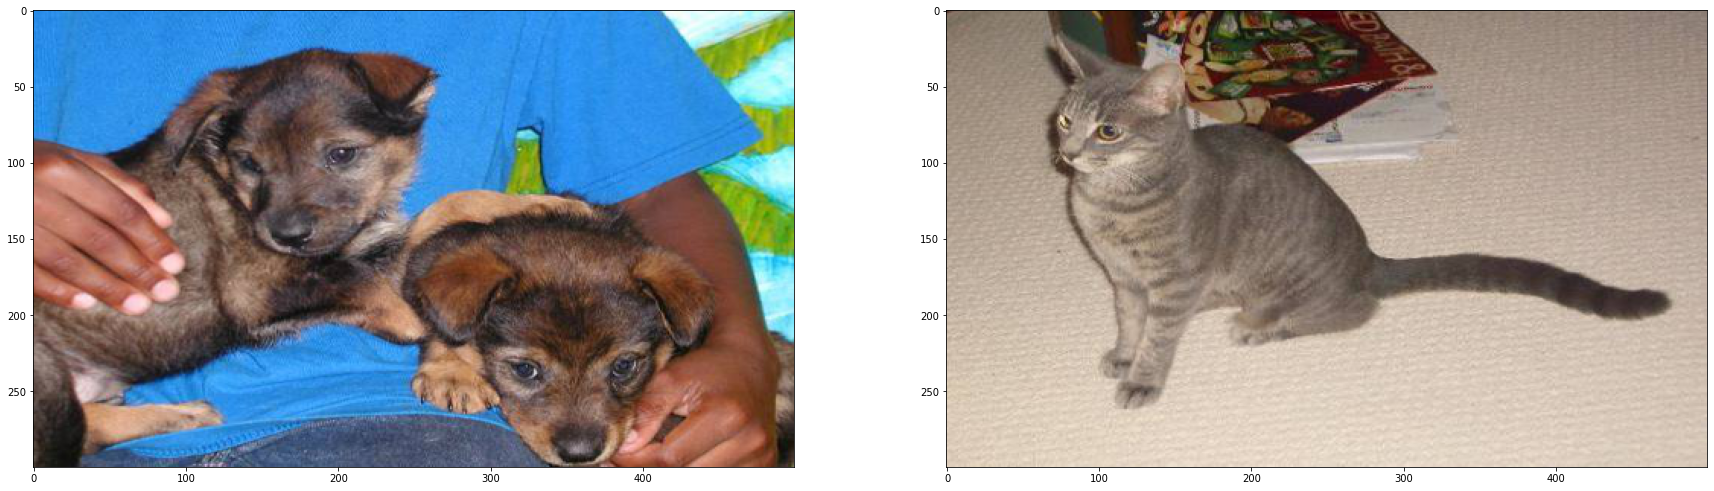

In [ ]:
#Выводим тестовые картинки по каждому классу

fig, axs = plt.subplots(1, 2, figsize=(30, 50)) #Создаем полотно из 2 графиков
for i in range(2): #Проходим по всем изображениям
  sample_path = '/content/dogs-vs-cats/sample/' + os.listdir(test_path)[i] #Формируем путь к каждому изображению
  axs[i].imshow(image.load_img(sample_path, target_size=(300, 500))) #Отображение картинки

plt.show() #Показываем изображения

In [ ]:
import findspark
# Указываем путь, по которому расположен PySpark
findspark.init()

In [ ]:
SUBMIT_ARGS = '--packages databricks:spark-deep-learning:1.0.0-spark2.3-s_2.11 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = SUBMIT_ARGS

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DL with Spark Deep Coqnition').getOrCreate()
sc = spark.sparkContext

In [ ]:
from pyspark.ml.image import ImageSchema
image_df = ImageSchema.readImages('dogs-vs-cats/sample/')
image_df.show(truncate=True)

+--------------------+
|               image|
+--------------------+
|[file:/content/do...|
|[file:/content/do...|
+--------------------+



In [ ]:
# Это будет наша Keras модель
from keras.applications import InceptionV3

model = InceptionV3(weights="imagenet")
model.save('model-dogs-vs-cats.h5')  

In [ ]:
#### Аналогичный разворот модели предобученной сетки
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from sparkdl import KerasImageFileTransformer

def loadAndPreprocessKerasInceptionV3(uri_df):
  # загрузка изображения с помощью инструментов keras
    image = img_to_array(load_img(uri_df, target_size=(500, 300)))  # размеры изображения для InceptionV3
    image = np.expand_dims(image, axis=0)
    return preprocess_input(image)

transformer = KerasImageFileTransformer(inputCol="uri", outputCol="predictions", # uri - идентификаторы будущего xTrain
                                        modelFile='model-full.h5',  # здесь путь к модели
                                        imageLoader=loadAndPreprocessKerasInceptionV3, # объект-предобработка/загрузка изображения
                                        outputMode="vector") # по умолчанию

fs = !ls flower_photos/sample/*.jpg

**Протестируем**

Скачала на кошке

In [ ]:
from pyspark.sql.types import StringType
uri_df = spark.createDataFrame(['dogs-vs-cats/sample/cat.2336.jpg'], StringType()).toDF("uri") # возьмем один экземпляр и склеим из него DataFrame
uri_df.show()

+--------------------+
|                 uri|
+--------------------+
|dogs-vs-cats/samp...|
+--------------------+



In [ ]:
keras_pred_df = transformer.transform(uri_df)

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


INFO:tensorflow:Froze 378 variables.
Converted 378 variables to const ops.
INFO:tensorflow:Froze 0 variables.
Converted 0 variables to const ops.


In [ ]:
keras_pred_df.show(truncate=False)

+--------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
np.argmax(np.array(keras_pred_df.collect()[0][1]))

285

проверим корректность распознования на гитхабе

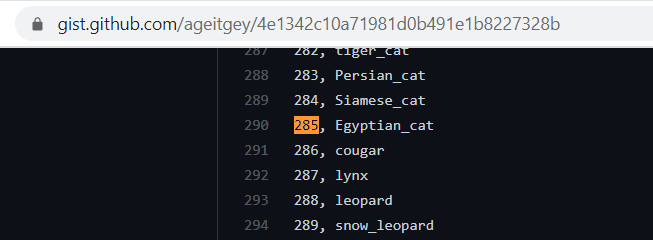

И на щеночках протестируем

In [ ]:
uri_df = spark.createDataFrame(['dogs-vs-cats/sample/dog.12400.jpg'], StringType()).toDF("uri") # возьмем один экземпляр и склеим из него DataFrame
uri_df.show()

+--------------------+
|                 uri|
+--------------------+
|dogs-vs-cats/samp...|
+--------------------+



In [ ]:
keras_pred_df_2 = transformer.transform(uri_df)

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


INFO:tensorflow:Froze 378 variables.
Converted 378 variables to const ops.
INFO:tensorflow:Froze 0 variables.
Converted 0 variables to const ops.


In [ ]:
keras_pred_df_2.show(truncate=False)

+---------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
np.argmax(np.array(keras_pred_df_2.collect()[0][1]))

235

проверим коррктность распознования на гитхабе

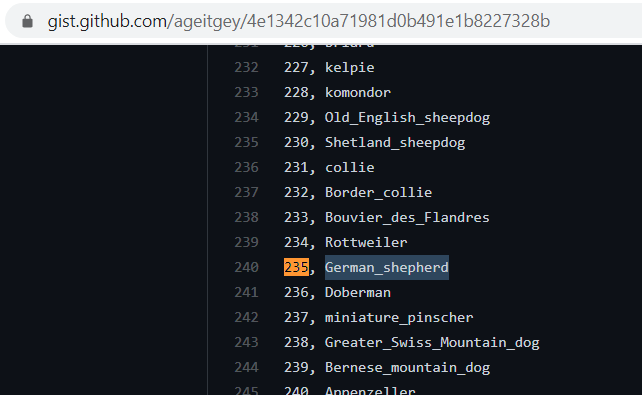

Результат отличный! Даже когда на изображении 2 собачки он понял что это немецкие овчарки! 